In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv


In [3]:
df=pd.read_csv('sign_mnist_train.csv')
print(df.describe())
df

              label        pixel1        pixel2        pixel3        pixel4  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean      12.318813    145.419377    148.500273    151.247714    153.546531   
std        7.287552     41.358555     39.942152     39.056286     38.595247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000    121.000000    126.000000    130.000000    133.000000   
50%       13.000000    150.000000    153.000000    156.000000    158.000000   
75%       19.000000    174.000000    176.000000    178.000000    179.000000   
max       24.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     156.210891    158.411255    160.472154    162.339683    163.954799   
std       37.111165     36.125579     35.016392    

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [4]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.28))
model.add(layers.Dense(26,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
X=df.drop('label',axis=1).values
Y=df['label'].values
X=X/255.0
X=X.reshape(-1,28,28,1)
Y=keras.utils.to_categorical(Y,num_classes=26)
history=model.fit(X,Y,epochs=20,batch_size=64,validation_split=0.2)
print("training accuracy = ",history.history['accuracy'][-1])
print("training loss = ",history.history['loss'][-1])
print("validation accuracy = ",history.history['val_accuracy'][-1])
print("validation loss = ",history.history['val_loss'][-1])

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.2326 - loss: 2.5992 - val_accuracy: 0.8406 - val_loss: 0.5841
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7900 - loss: 0.6468 - val_accuracy: 0.9698 - val_loss: 0.1487
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9101 - loss: 0.2782 - val_accuracy: 0.9949 - val_loss: 0.0556
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9530 - loss: 0.1542 - val_accuracy: 0.9969 - val_loss: 0.0249
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9694 - loss: 0.0985 - val_accuracy: 0.9996 - val_loss: 0.0108
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9804 - loss: 0.0670 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.9828 - loss: 0.0543 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.9869 - loss: 0.0425 - 

Text(0.5, 1.0, 'accuracy to iterations graphical analysis')

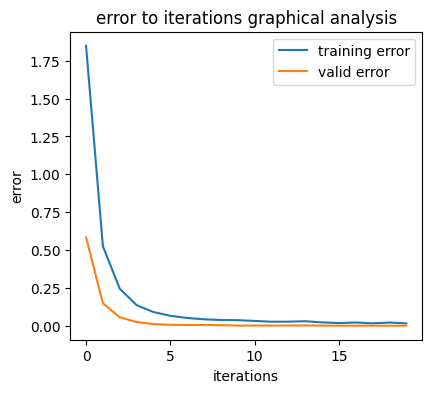

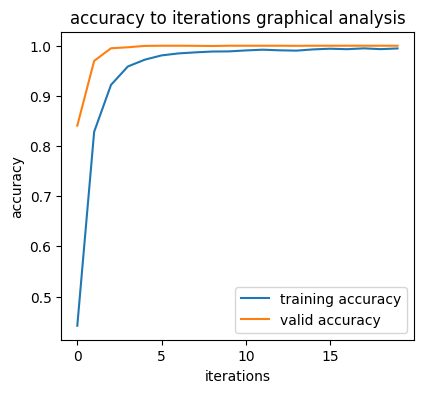

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='training error')
plt.plot(history.history['val_loss'],label='valid error')
plt.xlabel('iterations')
plt.ylabel('error')
plt.legend()
plt.title('error to iterations graphical analysis')
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='valid accuracy')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend()
plt.title('accuracy to iterations graphical analysis')

In [7]:
testerror,testaccuracy=model.evaluate(X,Y)
print("test error = ",testerror)
print("test accuracy = ",testaccuracy)

858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 1.0000 - loss: 1.5940e-04
test error =  0.00015285990957636386
test accuracy =  1.0


In [8]:
with open('observations.txt', 'w') as file:
    file.write("Observations on Overfitting Issues in the Project\n\n")

    file.write("1. Overfitting Identification:\n")
    file.write("Overfitting was identified by observing a noticeable gap between the training and validation loss/accuracy curves, "
               "where the training performance was significantly better than validation performance. "
               "This indicates that the model is memorizing the training data rather than generalizing well to unseen data.\n\n")

    file.write("2. Handling Overfitting with CNN:\n")
    file.write("The CNN architecture addresses overfitting by using shared convolutional kernels, "
               "which extract features irrespective of their position in the image. "
               "This reduces the number of parameters and improves generalization.\n\n")

    file.write("3. Impact of Adding Another Dropout Layer:\n")
    file.write("Including an additional Dropout layer (e.g., with a rate of 0.4) after the convolutional layers could further reduce overfitting "
               "by randomly deactivating neurons during training. This prevents the network from relying too heavily on specific neurons "
               "and helps learning more robust features.\n\n")

    file.write("4. Shared Structure and Invariance Properties:\n")
    file.write("- Shared Structure Property: The shared weights of the convolutional layers ensure that the same kernel is applied across the image. "
               "This helps the model detect features like edges and textures regardless of their location.\n")
    file.write("- Invariance Property: Techniques like max-pooling give spatial invariance, allowing the network to focus on the presence of features "
               "rather than their exact location.\n\n")

    file.write("5. Recommendations:\n")
    file.write("- We can add another Dropout layer (rate 0.4) after the convolutional layers to address overfitting.\n")
    file.write("- We can use techniques like data augmentation (rotation, flipping, scaling) to improve the model's generalization.\n")
    file.write("- experminenting with different optimizer hyperparameters for further improvement in performance.\n")

print("observations saved to 'observations.txt'.")

observations saved to 'observations.txt'.
